Este gráfico presenta la evolución del valor total de compras realizadas mes a mes desde el año 2019 hasta 2025. El objetivo de este análisis es identificar patrones temporales, estacionalidades o comportamientos anómalos que ayuden a tomar decisiones más informadas.

🔍 Observaciones clave:

Se observa una alta volatilidad mensual, con picos de compra pronunciados en ciertos meses específicos, lo cual podría estar asociado a promociones, campañas estacionales o acumulación de pedidos.
A partir de 2022 y 2023 se registran los valores más altos de compra mensual, lo que sugiere un posible crecimiento o concentración de la demanda en esos años.

In [2]:
#Carga de datos de proveedores para analisis asociado en Premium Choice
import pandas as pd
from pathlib import Path

# Ruta del archivo
ruta_proveedores = Path("../data/raw/proveedores.xlsx")

# Cargar archivo
df_proveedores = pd.read_excel(ruta_proveedores, engine="openpyxl")

# Verificar carga
df_proveedores.head()


,codigo,razonsocial,direccion,nombre ciudad,codciudad,plazo,telefonos,contacto,telefonos.1,telefonos.2,email,nit,dv,pais
0,PR 10338,A&M INTERNACIONAL DE COMERCIO SAS,CL 70A # 12-25,BOGOTA D. C.,11001,0,6157778/3102391183,NaN,3102391183,6157778,AYMINT@YAHOO.ES,830133260,0,CO - COLOMBIA
1,PR 30014,ACERO AVENDANO LUZ STELLA,CLL 70D BIS 107A-85 P-3,BOGOTA D. C.,11001,15,549 1442- - - -,NaN,NaN,NaN,NaN,51952915,4,CO - COLOMBIA
2,PR 10001,ACERO AVENDAÑO LUZ STELLA/FIBRAS,CALLE 70 D BIS 107 A 85,BOGOTA D. C.,11001,0,549 1442- - - -,NaN,NaN,NaN,NaN,51952915,0,CO - COLOMBIA
3,PR 100000000040,ACERO LUGO JOSE HUGO,CL 26 SUR 93 D 68 IN 4 CA 106,BOGOTA D. C.,11001,0,3597399 3202326789,NaN,NaN,NaN,NaN,79435630,5,CO - COLOMBIA
4,PR 10355,ACEVEDO AGUDELO CARLOS ARTURO,AV 6 NORTE 23D-66,CALI,76001,0,6608973-6608969,NaN,NaN,NaN,NaN,70548572,9,CO - COLOMBIA


In [3]:
#Exploracion inicial de los proveedores asociados a Premium Choice 
# Información general
df_proveedores.info()

# Ver los nombres de columnas
df_proveedores.columns.tolist()

# Estadísticas descriptivas (si hay columnas numéricas)
df_proveedores.describe(include="all")

# Revisar valores nulos
df_proveedores.isnull().sum()

# Verificar duplicados
df_proveedores.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   codigo         731 non-null    object
 1   razonsocial    731 non-null    object
 2   direccion      603 non-null    object
 3   nombre ciudad  729 non-null    object
 4   codciudad      731 non-null    int64 
 5   plazo          731 non-null    int64 
 6   telefonos      611 non-null    object
 7   contacto       59 non-null     object
 8   telefonos.1    71 non-null     object
 9   telefonos.2    17 non-null     object
 10  email          243 non-null    object
 11  nit            729 non-null    object
 12  dv             731 non-null    int64 
 13  pais           728 non-null    object
dtypes: int64(3), object(11)
memory usage: 80.1+ KB


1

Esta visualización permite identificar las columnas con mayor presencia de datos faltantes, lo cual es esencial para la limpieza, depuración y posterior confiabilidad del análisis.

📊 Gráfico generado: Cantidad de valores nulos por columna

El gráfico de barras presenta el total de valores nulos por cada campo del archivo de proveedores, ordenado de mayor a menor.
Las columnas con mayor ausencia de datos son:
telefonos.2 (más de 700 registros incompletos)
contacto y telefonos.1 (más de 650 nulos cada una)
email y direccion también presentan vacíos considerables.
🧠 Implicaciones clave:

Estas columnas pueden requerir:
Imputación de datos si se consideran relevantes para el análisis o para la operación.
Eliminación o sustitución si no aportan valor o son irreparables.

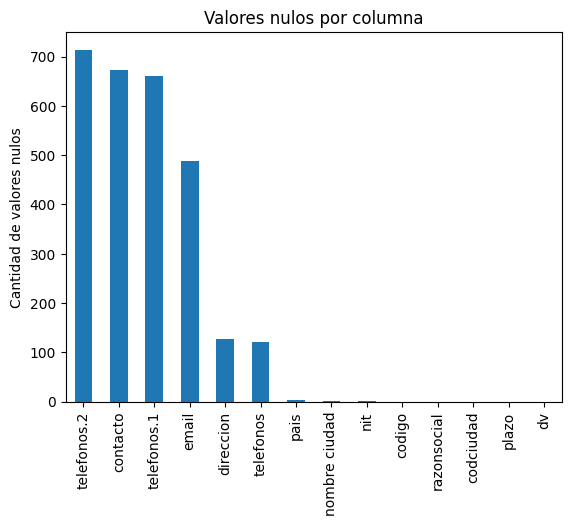

In [15]:
#Visualizacion de datos con el mayor numero de valores faltantes 
df_proveedores.isnull().sum().sort_values(ascending=False).plot(kind='bar', title='Valores nulos por columna')
plt.ylabel('Cantidad de valores nulos')
plt.show()


In [16]:
#Verificacion de la autenticidad de los proveedores a partir de los NIT duplicados 
df_proveedores['nit'].duplicated().sum()


69

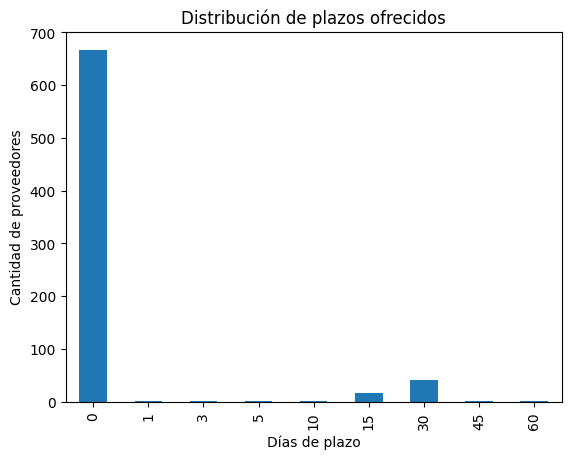

In [17]:
#Identificacion del comportamiento financiero de los proveedores
df_proveedores['plazo'].value_counts().sort_index().plot(kind='bar', title='Distribución de plazos ofrecidos')
plt.xlabel('Días de plazo')
plt.ylabel('Cantidad de proveedores')
plt.show()


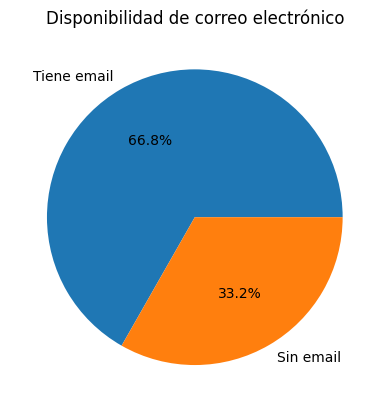

In [18]:
#Frecuencia de email nulos vs no nulos 
df_proveedores['email'].isnull().value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Tiene email', 'Sin email'], title='Disponibilidad de correo electrónico')
plt.ylabel('')
plt.show()


In [19]:
#Top 10 de los contactos repetidos 
df_proveedores['contacto'].value_counts().head(10)


contacto
ROBERTO MORENO                                                      2
JOHANA CARDENAS                                                     1
RAUL RAMOS GERENTE OPERATIVO                                        1
JUAN CAMILO JARAMILLO MEJIA                                         1
ALEJANDRA MOLANO (ANALISTA CONTABLE)ANA CRISTINA TERAN(TESORERA)    1
ERICK BEHAR VILLEGAS                                                1
CAROL HERNANDEZ                                                     1
ANGIE GUTIEREZ ROJAS(AUX.CARTERA)                                   1
PETER HUHN                                                          1
ESTEFANIA BERNAL                                                    1
Name: count, dtype: int64

In [21]:
#Normalizacion de los nombres de ciudad y de pais 
df_proveedores['nombre ciudad'] = df_proveedores['nombre ciudad'].str.strip().str.upper()
df_proveedores['pais'] = df_proveedores['pais'].str.strip().str.upper()



In [7]:
#Distribucion de los proveedores por pais 
df_proveedores['pais'] = df_proveedores['pais'].str.strip()  # por si hay espacios
df_proveedores['pais'].value_counts().head(10)




pais
CO - COLOMBIA     721
IT - ITALIA         5
PT - PORTUGAL       1
DK - DINAMARCA      1
Name: count, dtype: int64

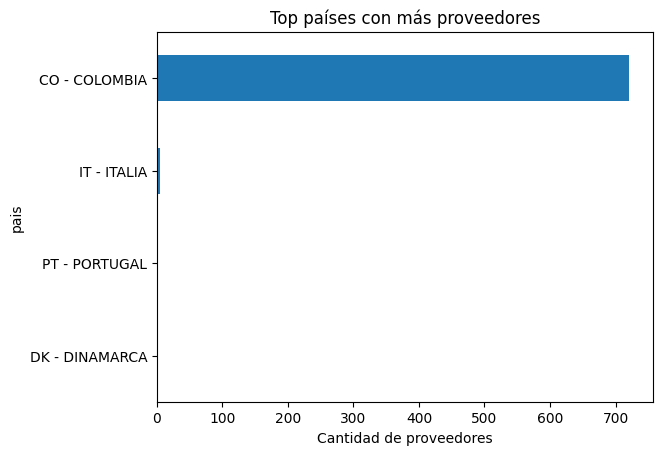

In [8]:
#Top de los paises que representa el mayor numero de proveedores
import matplotlib.pyplot as plt

df_proveedores['pais'].value_counts().head(10).plot(kind='barh', title='Top países con más proveedores')
plt.xlabel('Cantidad de proveedores')
plt.gca().invert_yaxis()
plt.show()


In [9]:
#Verificacion de los valores nulos asociados en el dataframe
df_proveedores.isnull().sum().sort_values(ascending=False)


telefonos.2      714
contacto         672
telefonos.1      660
email            488
direccion        128
telefonos        120
pais               3
nombre ciudad      2
nit                2
codigo             0
razonsocial        0
codciudad          0
plazo              0
dv                 0
dtype: int64

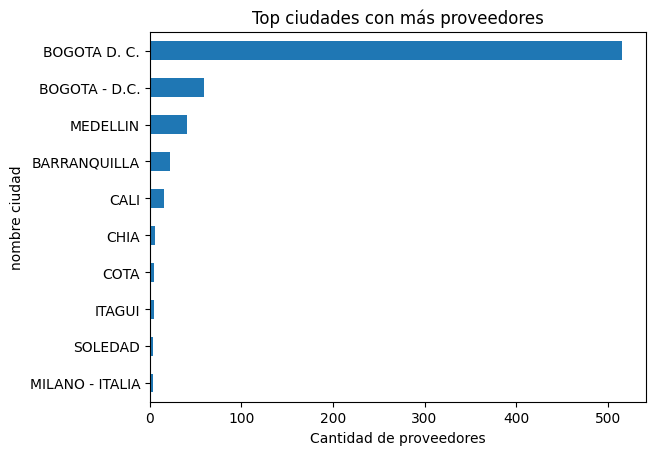

In [10]:
#Top de las ciudades que representan mas proveedores
df_proveedores['nombre ciudad'] = df_proveedores['nombre ciudad'].str.strip()
df_proveedores['nombre ciudad'].value_counts().head(10).plot(kind='barh', title='Top ciudades con más proveedores')
plt.xlabel('Cantidad de proveedores')
plt.gca().invert_yaxis()
plt.show()


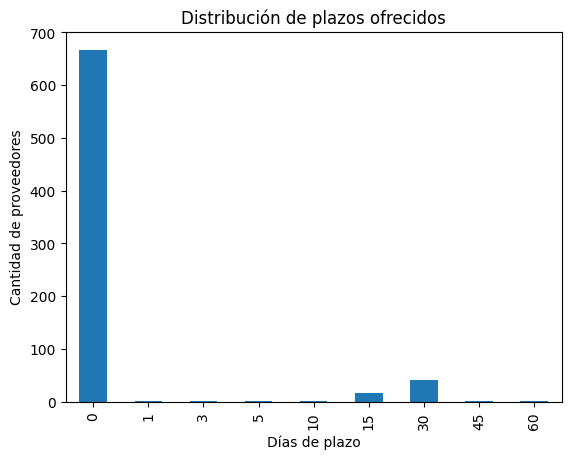

In [11]:
#Distribucion de plazos de pago ofrecidos por los proveedores 
df_proveedores['plazo'].value_counts().sort_index().plot(kind='bar', title='Distribución de plazos ofrecidos')
plt.xlabel('Días de plazo')
plt.ylabel('Cantidad de proveedores')
plt.show()


In [13]:
#Conteo de los proveedores por el tipo de contacto 
print(f"Proveedores con email: {(df_proveedores['email'].notnull()).sum()}")
print(f"Proveedores con contacto asignado: {(df_proveedores['contacto'].notnull()).sum()}")



Proveedores con email: 243
Proveedores con contacto asignado: 59


In [14]:
#Validacion de proveedores de unidad NIT 
df_proveedores['nit'].nunique(), df_proveedores.shape[0]


(661, 731)